# <span style="color:teal"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import log, exp, sqrt

# data
S_0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S_0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S_0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


<br>

#### <font face = "Tahoma" style="color:teal"><b>Utili per tutti i punti:</b></font>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import numpy as np
import math

N=100

In [3]:
def graphic(y1,err1,y2,err2,case):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
    
    font = FontProperties()
    font.set_name('Times New Roman')
    
    x = np.arange(100)
    X = [0, 100]
    Y = [0,0]
       
    ax0.errorbar(x,y1,yerr=err1)
    ax0.plot(X,Y,'k--')
    ax0.set_title('\n Call opion - '+case, color='C0', fontsize=14)
    ax0.set_ylabel('Price - 14.9757...',fontproperties=font)
    ax0.set_xlabel('blocks',fontproperties=font)
    ax0.grid(alpha=0.4)
    
    ax1.errorbar(x,y2,yerr=err2)
    ax1.plot(X,Y,'k--')
    ax1.set_title('\n Put opion - '+case, color='C0', fontsize=14)
    ax1.set_ylabel('\n Price - 5.4595...',fontproperties=font)
    ax1.set_xlabel('blocks',fontproperties=font)
    ax1.grid(alpha=0.4)

    fig.tight_layout()
    plt.show()

### <font face = "Tahoma" style="color:teal"><b>Punto 1.  </b></font>  Sampling directly the final asset price $S(T)$ for a $ GBM(r,\sigma^2) $

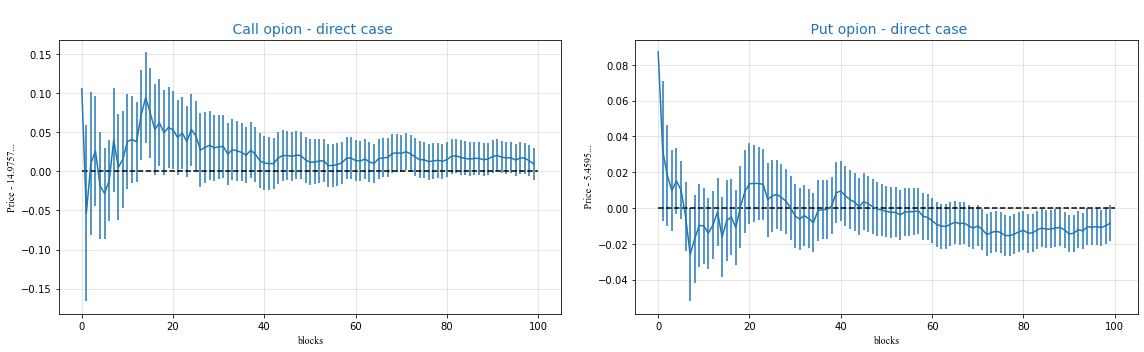

In [4]:
call_dir = np.loadtxt(fname='Lecture03/BLACKSHOLES/call_option_direct.dat',usecols=2)
err_call_dir = np.loadtxt(fname='Lecture03/BLACKSHOLES/call_option_direct.dat',usecols=3)
put_dir = np.loadtxt(fname='Lecture03/BLACKSHOLES/put_option_direct.dat',usecols=2)
err_put_dir = np.loadtxt(fname='Lecture03/BLACKSHOLES/put_option_direct.dat',usecols=3)

graphic(call_dir-14.975790778311286,err_call_dir,put_dir-5.4595325819072364,err_put_dir,'direct case')

In [5]:
print('call: ',call_dir[N-1],' +\- ',err_call_dir[N-1])
print('put: ',put_dir[N-1],' +\- ',err_put_dir[N-1])

call:  14.9852  +\-  0.0201309
put:  5.45104  +\-  0.0100356


### <font face = "Tahoma" style="color:teal"><b>Punto 2. </b></font> sampling the discretized $GBM(r,\sigma^2)$ path of the asset price dividing $\left[0,T\right]$ in $10^2$ time intervals

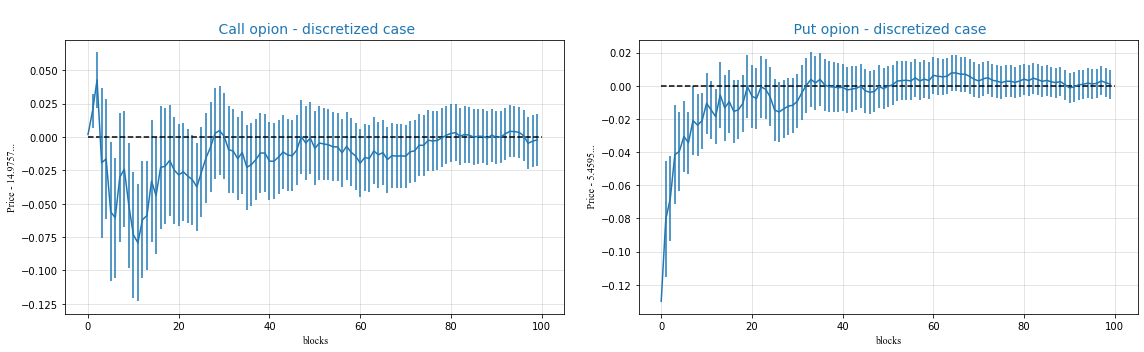

In [6]:
call_disc = np.loadtxt(fname='Lecture03/BLACKSHOLES/call_option_discretized.dat',usecols=2)
err_call_disc = np.loadtxt(fname='Lecture03/BLACKSHOLES/call_option_discretized.dat',usecols=3)
put_disc = np.loadtxt(fname='Lecture03/BLACKSHOLES/put_option_discretized.dat',usecols=2)
err_put_disc = np.loadtxt(fname='Lecture03/BLACKSHOLES/put_option_discretized.dat',usecols=3)

graphic(call_disc-14.975790778311286,err_call_disc,put_disc-5.4595325819072364,err_put_disc,'discretized case')

In [7]:
print('call: ',call_disc[N-1],' +\- ',err_call_disc[N-1])
print('put: ',put_disc[N-1],' +\- ',err_put_disc[N-1])

call:  14.9737  +\-  0.0193167
put:  5.46052  +\-  0.00867587
